In [1]:
!pip install "numpy<2.0"


  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Sneha\\anaconda3\\Lib\\site-packages\\~--py.libs\\libscipy_openblas64_-43e11ff0749b8cbe0a615c9cf6737e0e.dll'
Consider using the `--user` option or check the permissions.



In [2]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pydot graphviz

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

C:\Users\Sneha\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pip install --upgrade numpy


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Sneha\\anaconda3\\Lib\\site-packages\\~-~py.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.




  Using cached numpy-2.2.0-cp310-cp310-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


In [3]:
pip install --upgrade numpy scipy scikit-learn


In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, \
                             accuracy_score)
import cv2

In [5]:
import os
os.chdir('C:/Datasets/dermnet')  # Change this path to where your dataset is stored


In [6]:
import os

train_dir = './train'
test_dir = './test'




In [7]:
acne_train_path = os.path.join(train_dir, 'Acne and Rosacea Photos')
actinic_train_path = os.path.join(train_dir, 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions')
melonama_train_path = os.path.join(train_dir, 'Melanoma Skin Cancer Nevi and Moles')

acne_test_path = os.path.join(test_dir, 'Acne and Rosacea Photos')
actinic_test_path = os.path.join(test_dir, 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions')
melonama_test_path = os.path.join(test_dir, 'Melanoma Skin Cancer Nevi and Moles')

# Get the list of files in each test folder
actinic_test_files = ([files_ for _, _, files_ in os.walk(actinic_test_path)])[0]
acne_test_files = ([files_ for _, _, files_ in os.walk(acne_test_path)])[0]
melonama_test_files = ([files_ for _, _, files_ in os.walk(melonama_test_path)])[0]

# Iterate through all training directories and print folder names
our_folders = ['Acne and Rosacea Photos',
               'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
               'Melanoma Skin Cancer Nevi and Moles']

train_dirs = []
for i in our_folders:
    for folder_, _, files_ in os.walk(f'./train/{i}'):
        print("Folder:", folder_)
        train_dirs.append(folder_)

# Get the list of files in each training folder
actinic_train_files = ([files_ for _, _, files_ in os.walk(actinic_train_path)])[0]
acne_train_files = ([files_ for _, _, files_ in os.walk(acne_train_path)])[0]
melonama_train_files = ([files_ for _, _, files_ in os.walk(melonama_train_path)])[0]

# Print some details for verification
print(f"Number of files in Actinic Test: {len(actinic_test_files)}")
print(f"Number of files in Acne Train: {len(acne_train_files)}")
print(f"Number of files in Melanoma Train: {len(melonama_train_files)}")

Folder: ./train/Acne and Rosacea Photos
Folder: ./train/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
Folder: ./train/Melanoma Skin Cancer Nevi and Moles
Number of files in Actinic Test: 288
Number of files in Acne Train: 840
Number of files in Melanoma Train: 463


In [8]:
# def plotGridImages(d_name, list_files, train_path,nrows= 1, ncols=5):
#     # for folder_name in our_folders:
#     fig = plt.figure(1, figsize=(30, 30))
#     grid = ImageGrid(fig, 111, nrows_ncols=(nrows, ncols), axes_pad=0.05)
#     print(f"{d_name}")
#     for i, img_id in enumerate(random.sample(list_files,ncols)):
#         ax = grid[i]
#         image_dir_path = os.path.join(train_path, img_id)
#         img = image.load_img(image_dir_path, (224, 224))
#         img = image.img_to_array(img)
#         ax.imshow(img / 255.)
#         ax.text(10, 200, 'LABEL: %s' % d_name, color='k', backgroundcolor='w',\
#         alpha=0.8)
#         ax.axis('off')
#     # plt.tight_layout()
#     plt.show()
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def plotGridImages(d_name, list_files, train_path, nrows=2, ncols=5):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 8))
    fig.suptitle(f"Images from {d_name}", fontsize=16)
    grid = axes.ravel()

    for i, img_id in enumerate(list_files[:nrows * ncols]):
        ax = grid[i]
        image_dir_path = os.path.join(train_path, img_id)
        
        # Load and preprocess the image
        img = image.load_img(image_dir_path, target_size=(224, 224))  # Corrected here
        img = image.img_to_array(img) / 255.0  # Normalize the image to [0, 1]
        
        # Plot the image
        ax.imshow(img)
        ax.axis("off")
        
    plt.tight_layout()
    plt.show()


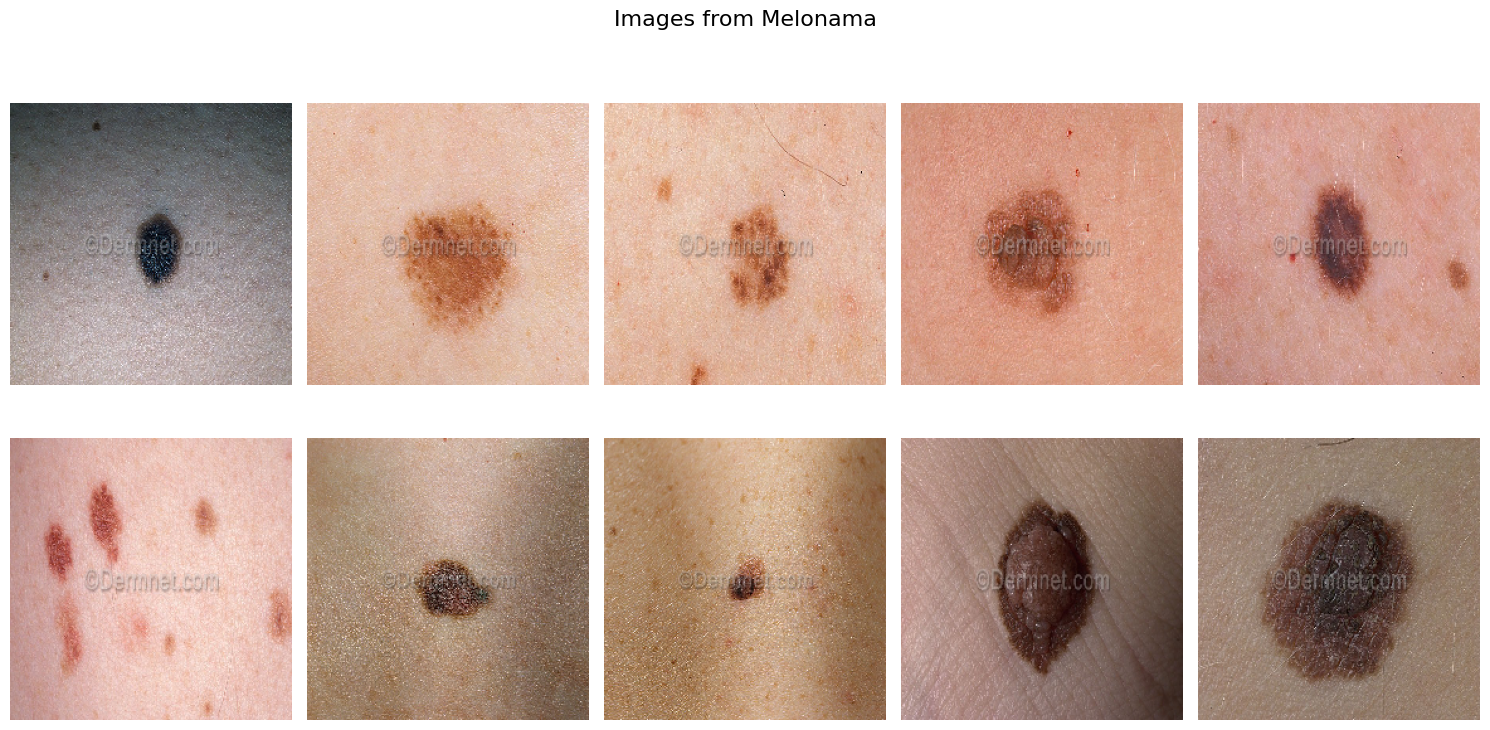

In [9]:
plotGridImages('Melonama',melonama_train_files, melonama_train_path,ncols=5)

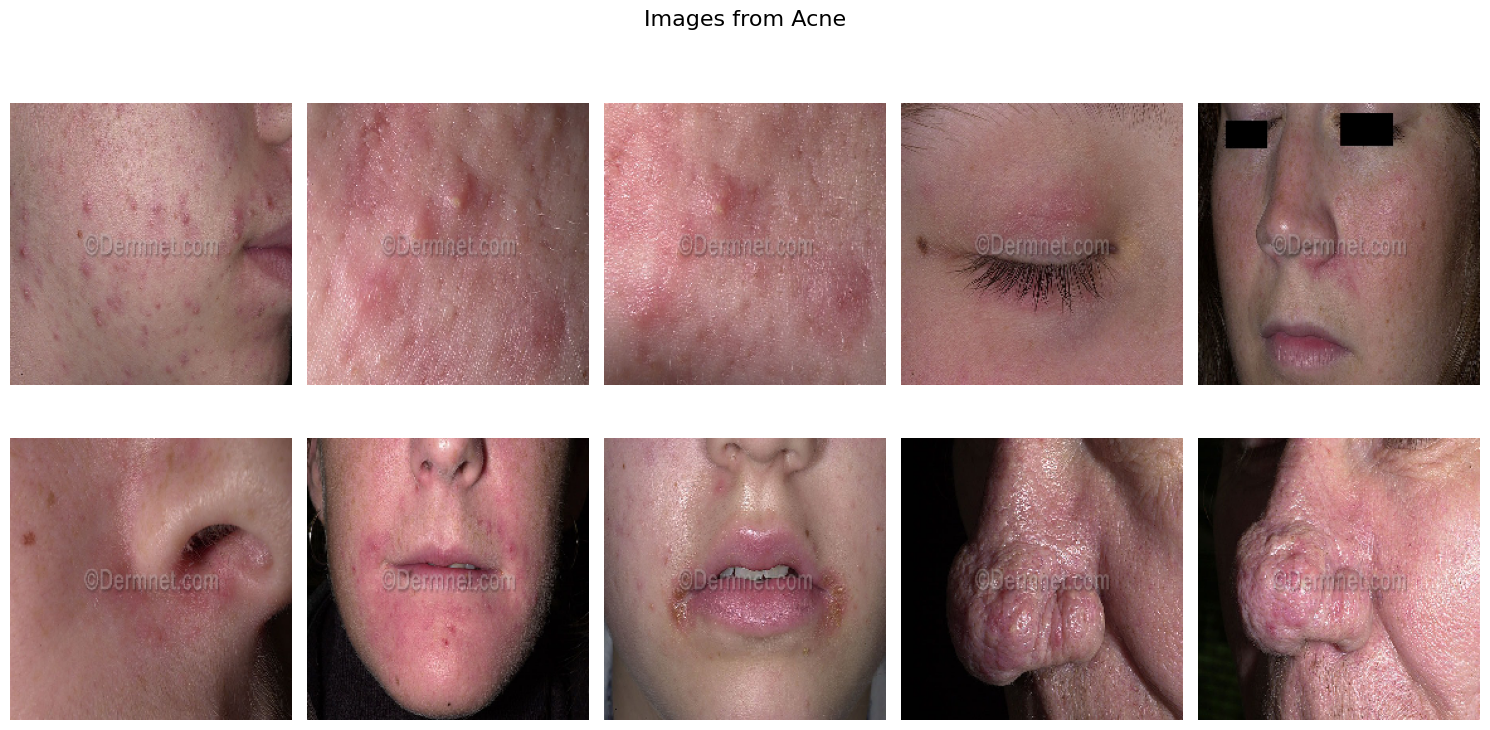

In [10]:
plotGridImages('Acne',acne_train_files, acne_train_path,ncols=5)

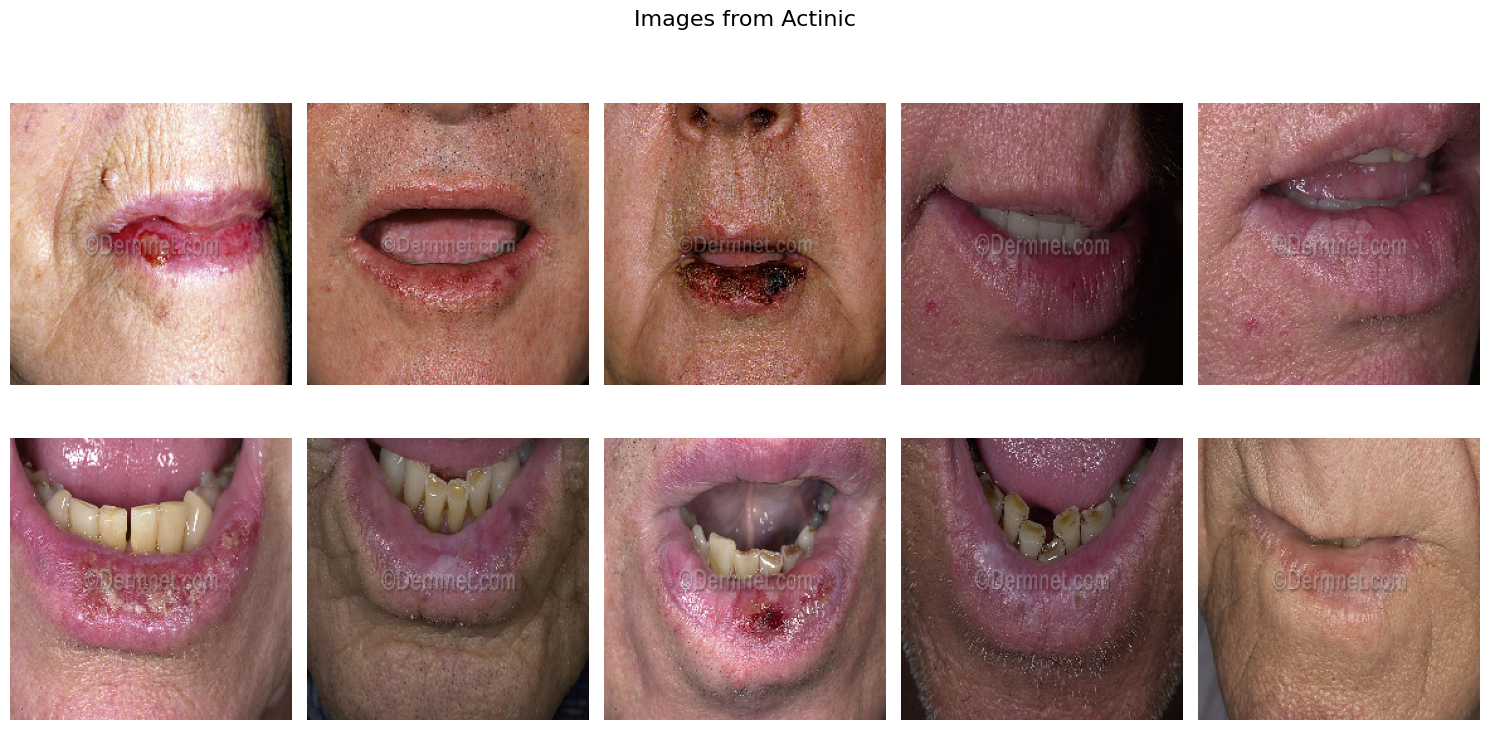

In [11]:
plotGridImages('Actinic',actinic_train_files, actinic_train_path,ncols=5)

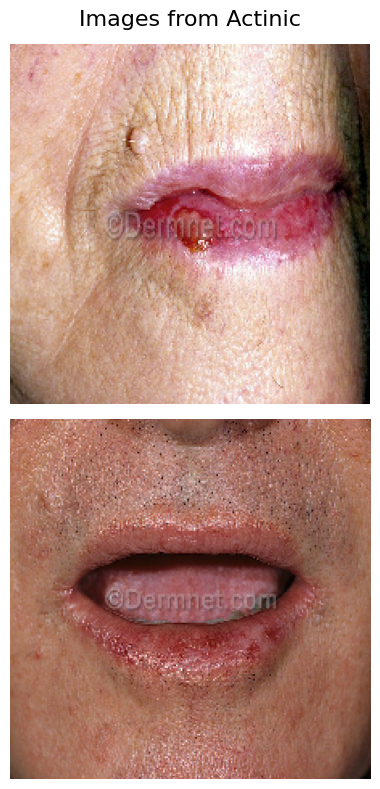

In [12]:
plotGridImages('Actinic',actinic_train_files, actinic_train_path,ncols=1)

In [13]:
final_df = pd.DataFrame()

In [14]:
melonama_df = pd.DataFrame()
melonama_df['Image'] = [melonama_train_path+'/'+img for img in melonama_train_files]
melonama_df['Label'] = "melonama"

In [15]:
melonama_df.shape

(463, 2)

In [16]:
actinic_df = pd.DataFrame()
actinic_df['Image'] =  [actinic_train_path+'/'+img for img in actinic_train_files]
actinic_df['Label'] = "actinic"

In [17]:
actinic_df.shape

(1149, 2)

In [18]:
acne_df = pd.DataFrame()
acne_df['Image'] =  [acne_train_path+'/'+img for img in acne_train_files]
acne_df['Label'] = "acne"

In [19]:
acne_df.shape

(840, 2)

In [20]:
# final_df = final_df.append([actinic_df, melonama_df, acne_df])
final_df = pd.concat([final_df, actinic_df, melonama_df, acne_df], ignore_index=True)

In [21]:
final_df.shape

(2452, 2)

In [22]:
final_df.sample(10)

Image     Label
93    ./train\Actinic Keratosis Basal Cell Carcinoma...   actinic
2243  ./train\Acne and Rosacea Photos/perioral-derma...      acne
1660  ./train\Acne and Rosacea Photos/acne-closed-co...      acne
1074  ./train\Actinic Keratosis Basal Cell Carcinoma...   actinic
829   ./train\Actinic Keratosis Basal Cell Carcinoma...   actinic
1799  ./train\Acne and Rosacea Photos/acne-cystic-86...      acne
1047  ./train\Actinic Keratosis Basal Cell Carcinoma...   actinic
404   ./train\Actinic Keratosis Basal Cell Carcinoma...   actinic
1459  ./train\Melanoma Skin Cancer Nevi and Moles/ma...  melonama
1825  ./train\Acne and Rosacea Photos/acne-excoriate...      acne

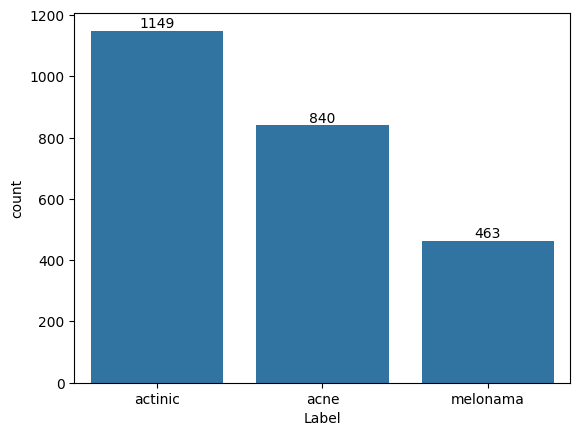

In [23]:
ax = sns.countplot(x=final_df['Label'],
                   order=final_df['Label'].value_counts(ascending=False).index);

abs_values = final_df['Label'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values);

In [24]:
final_test_df = pd.DataFrame()
################# melonama #########

melonama_test_df = pd.DataFrame()
melonama_test_df['Image'] = [melonama_test_path+'/'+img for img in melonama_test_files]
melonama_test_df['Label'] = "melonama"

##################  actinic  ##########

actinic_test_df = pd.DataFrame()
actinic_test_df['Image'] =  [actinic_test_path+'/'+img for img in actinic_test_files]
actinic_test_df['Label'] = "actinic"

acne_test_df = pd.DataFrame()
acne_test_df['Image'] =  [acne_test_path+'/'+img for img in acne_test_files]
acne_test_df['Label'] = "acne"
###########################################
###########################################
final_test_df = pd.concat([final_test_df, actinic_test_df, melonama_test_df, acne_test_df], ignore_index=True)


final_test_df.shape


(716, 2)

In [46]:
train_data_gen  = ImageDataGenerator(
                                    rescale=1 / 255.0,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    validation_split=0.2,
                                    fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale=1 / 255.0)

In [47]:
batch_size = 8
train_generator = train_data_gen.flow_from_dataframe(
    dataframe=final_df,
    x_col="Image",
    y_col="Label",
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode="categorical",#sparse
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_data_gen.flow_from_dataframe(
    dataframe=final_df,
    x_col="Image",
    y_col="Label",
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode="categorical", #sparse
    subset='validation',
    shuffle=True,
    seed=42 
)
test_generator = test_data_gen.flow_from_dataframe(
    dataframe=final_test_df,
    x_col="Image",
    y_col="Label",
    target_size=(256, 256),
    batch_size=1,
    class_mode='categorical',
    shuffle=False,
)

Found 1962 validated image filenames belonging to 3 classes.
Found 490 validated image filenames belonging to 3 classes.
Found 716 validated image filenames belonging to 3 classes.


In [62]:
res = VGG16(weights ='imagenet', include_top = False, 
               input_shape = (256, 256, 3)) 
               
# Setting the trainable to false
res.trainable = False
# for layer in res.layers[-4:]:  # Unfreeze last 4 layers
#     layer.trainable = True


x= res.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
# x = Dropout(0.5)(x) 
x = Dense(512, activation ='relu')(x)
x = BatchNormalization()(x)
x = Dense(256, activation ='relu')(x)
x = BatchNormalization()(x)

x = Dense(3, activation ='softmax')(x)
model = Model(res.input, x)
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=0.0001,
#     decay_steps=10000,
#     decay_rate=0.9
# )
# optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
# model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

model.compile(optimizer =tf.keras.optimizers.RMSprop(learning_rate=0.0001),  #'Adam'
              loss ="categorical_crossentropy",  #sparse_categorical_crossentropy
              metrics =["categorical_accuracy"])  #sparse_categorical_accuracy

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 512)                 │           2,0

 Total params: 15,114,563 (57.66 MB)

 Trainable params: 397,315 (1.52 MB)

 Non-trainable params: 14,717,248 (56.14 MB)

In [63]:
# from keras.utils.vis_utils import plot_model
# plot_model(model, show_shapes=True, show_layer_names=True)

from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [64]:
custom_early_stopping = EarlyStopping(
    monitor='loss',  # Monitor validation accuracy
    patience=10,              # Number of epochs with no improvement before stopping
    min_delta=0.01,          # Minimum change to qualify as improvement
    mode='min',              # We want accuracy to increase
#     baseline=0.80            # Stop if accuracy reaches or exceeds 80%
)


In [65]:
history = model.fit(
    train_generator, 
    epochs=50, 
    validation_data=valid_generator, 
    callbacks=[custom_early_stopping]
)

Epoch 1/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 356s 1s/step - categorical_accuracy: 0.3914 - loss: 1.3947 - val_categorical_accuracy: 0.2816 - val_loss: 1.1683
Epoch 2/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - categorical_accuracy: 0.5527 - loss: 1.0004 - val_categorical_accuracy: 0.5163 - val_loss: 1.0150
Epoch 3/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - categorical_accuracy: 0.5965 - loss: 0.9327 - val_categorical_accuracy: 0.5796 - val_loss: 0.9641
Epoch 4/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - categorical_accuracy: 0.6205 - loss: 0.8675 - val_categorical_accuracy: 0.5449 - val_loss: 1.0913
Epoch 5/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - categorical_accuracy: 0.6374 - loss: 0.8749 - val_categorical_accuracy: 0.5653 - val_loss: 0.9729
Epoch 6/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - categorical_accuracy: 0.6494 - loss: 0.8170 - val_categorical_accuracy: 0.5592 - val_loss: 1.0182
Epoch 7/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - categorical_accuracy: 0.637

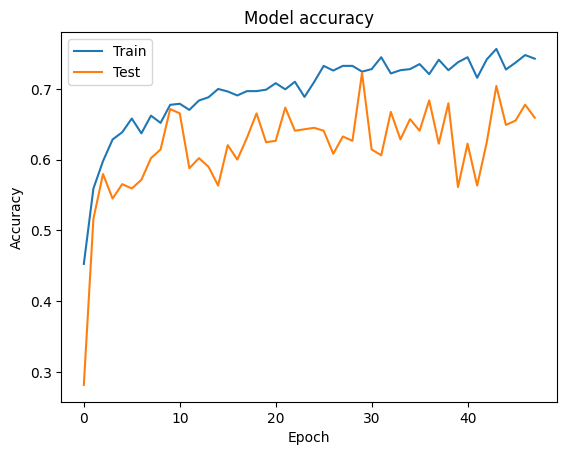

In [66]:
plt.plot(history.history['categorical_accuracy']) #sparse_categorical_accuracy
plt.plot(history.history['val_categorical_accuracy']) #val_sparse_categorical_accuracy
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

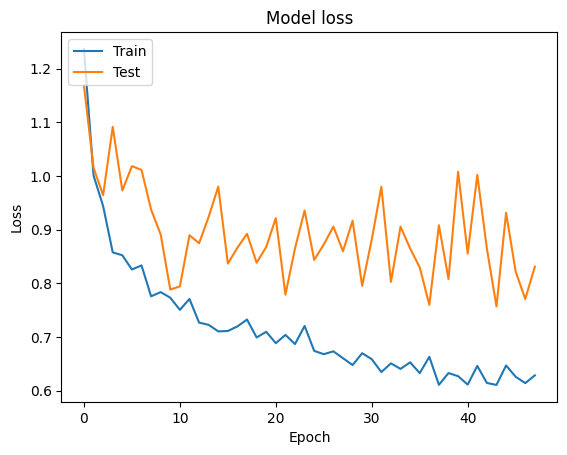

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

716/716 ━━━━━━━━━━━━━━━━━━━━ 232s 323ms/step


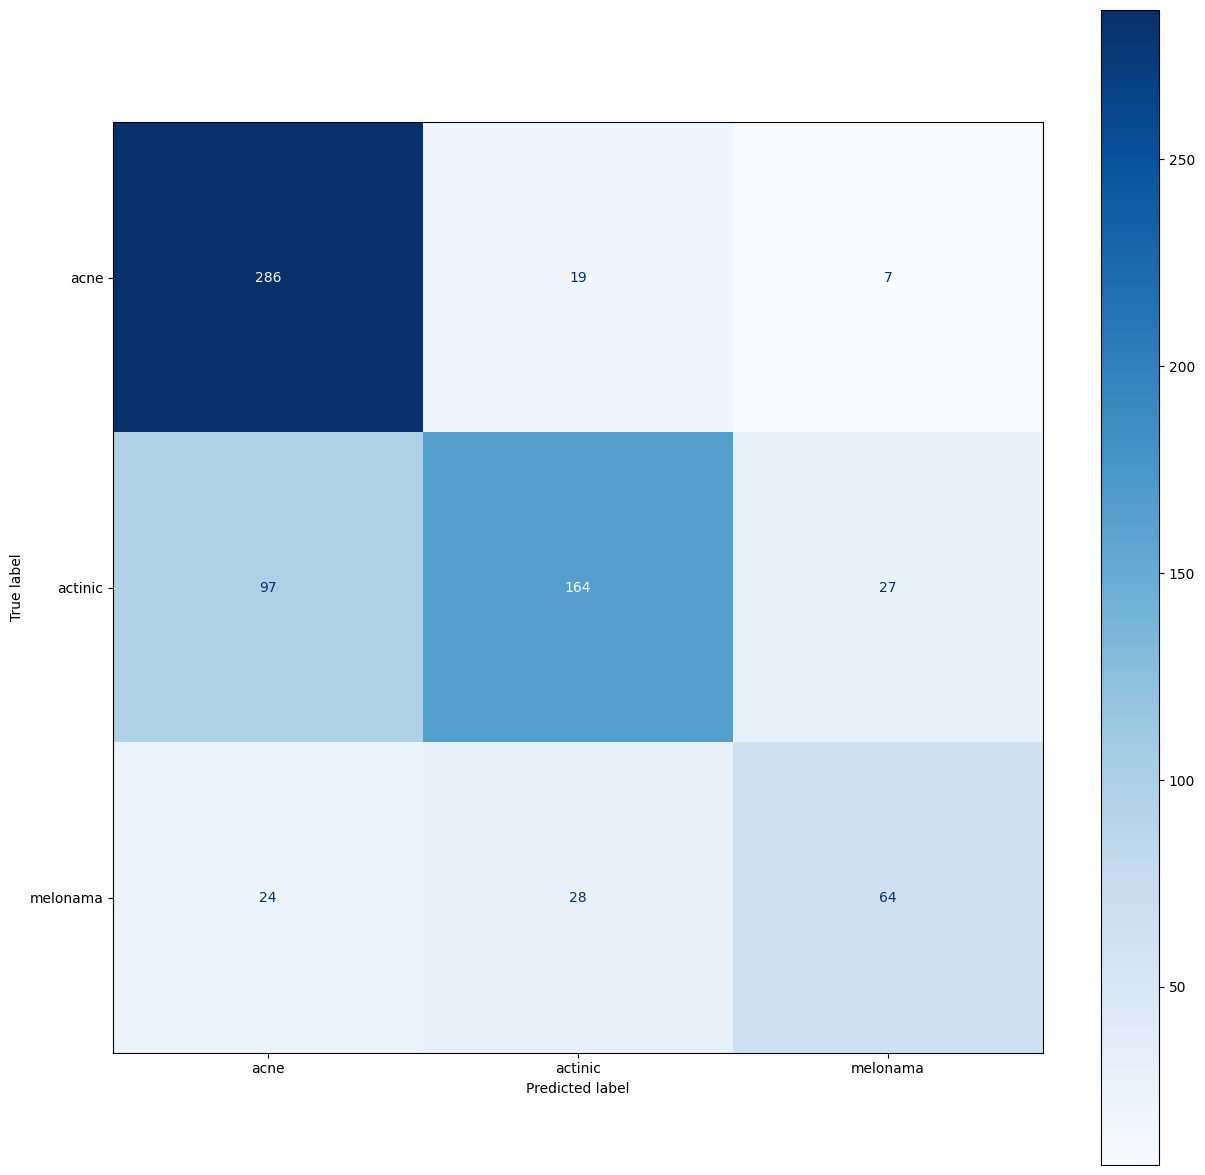

In [68]:
test_true=test_generator.classes
test_pred_raw = model.predict(test_generator)
test_pred = np.argmax(test_pred_raw, axis=1)

cm = confusion_matrix(test_true, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['acne','actinic','melonama'])
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.show()

In [69]:
result = model.evaluate(test_generator,batch_size=32)
print("test_loss, test accuracy",result)

716/716 ━━━━━━━━━━━━━━━━━━━━ 216s 301ms/step - categorical_accuracy: 0.5760 - loss: 1.0908
test_loss, test accuracy [0.7652032971382141, 0.7178770899772644]


In [70]:
vgg_preds = model.predict(test_generator)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

716/716 ━━━━━━━━━━━━━━━━━━━━ 224s 313ms/step


In [71]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())


vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("VGG16 Model Accuracy: {:.2f}%".format(vgg_acc * 100))

VGG16 Model Accuracy: 71.79%


In [72]:
model.save("skin_disease_model_2.keras")


In [73]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("skin_disease_model_2.keras")


In [74]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

File found!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step
Predicted class index: 1
Predicted class name: actinic


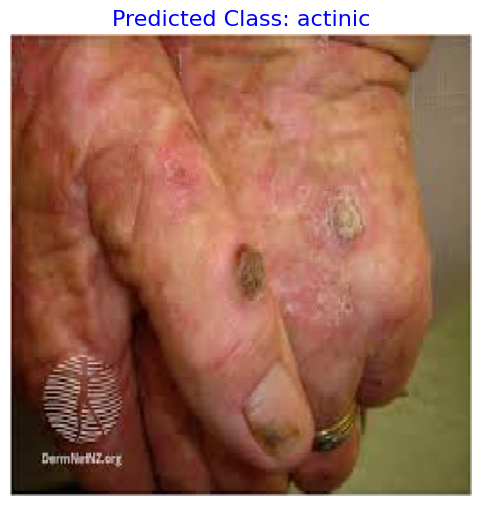

In [75]:
import os
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Specify the image path
image_path = r"C:\Users\Sneha\Downloads\testimage1.jpeg"

# Check if the file exists
if os.path.exists(image_path):
    print("File found!")
else:
    print("File not found. Please check the path:", image_path)

# Preprocess the image
img = load_img(image_path, target_size=(256, 256))  # Resize to match model input
img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction, axis=1)[0]  # Extract the index

# Map index to class name
class_indices = train_generator.class_indices  # Get mapping from training generator
index_to_class = {v: k for k, v in class_indices.items()}  # Reverse mapping
predicted_class_name = index_to_class[predicted_class_index]

# Print results
print("Predicted class index:", predicted_class_index)
print("Predicted class name:", predicted_class_name)

# Display the image with the predicted class name
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class_name}", fontsize=16, color="blue")
plt.show()


File found!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
Predicted class index: 1
Predicted class name: actinic


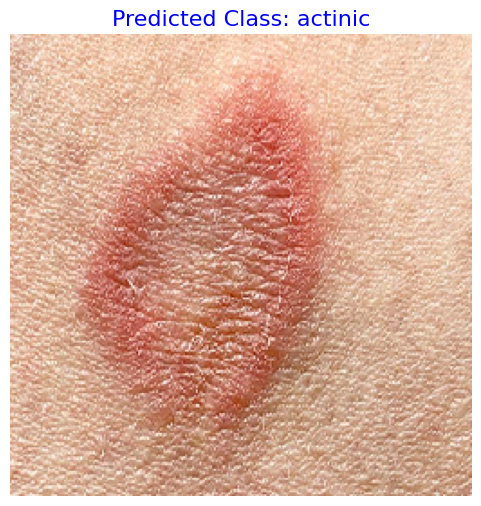

In [76]:
import os
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Specify the image path
image_path = r"C:\Users\Sneha\Downloads\4560-ringworm.jpg"

# Check if the file exists
if os.path.exists(image_path):
    print("File found!")
else:
    print("File not found. Please check the path:", image_path)

# Preprocess the image
img = load_img(image_path, target_size=(256, 256))  # Resize to match model input
img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction, axis=1)[0]  # Extract the index

# Map index to class name
class_indices = train_generator.class_indices  # Get mapping from training generator
index_to_class = {v: k for k, v in class_indices.items()}  # Reverse mapping
predicted_class_name = index_to_class[predicted_class_index]

# Print results
print("Predicted class index:", predicted_class_index)
print("Predicted class name:", predicted_class_name)

# Display the image with the predicted class name
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class_name}", fontsize=16, color="blue")
plt.show()


File found!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
Predicted class index: 1
Predicted class name: actinic


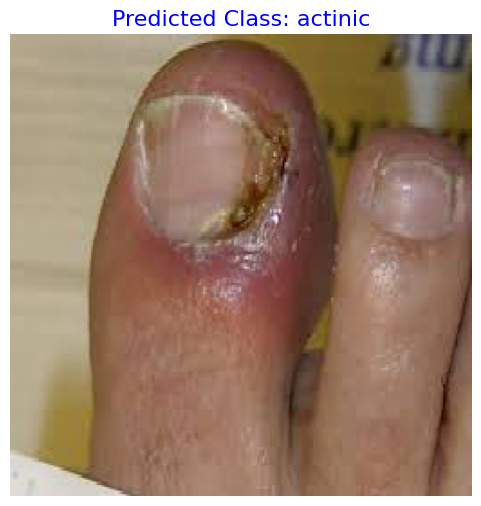

In [77]:
import os
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Specify the image path
image_path = r"C:\Users\Sneha\Downloads\download.jpeg"

# Check if the file exists
if os.path.exists(image_path):
    print("File found!")
else:
    print("File not found. Please check the path:", image_path)

# Preprocess the image
img = load_img(image_path, target_size=(256, 256))  # Resize to match model input
img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction, axis=1)[0]  # Extract the index

# Map index to class name
class_indices = train_generator.class_indices  # Get mapping from training generator
index_to_class = {v: k for k, v in class_indices.items()}  # Reverse mapping
predicted_class_name = index_to_class[predicted_class_index]

# Print results
print("Predicted class index:", predicted_class_index)
print("Predicted class name:", predicted_class_name)

# Display the image with the predicted class name
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class_name}", fontsize=16, color="blue")
plt.show()
